In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("D:\_Dev\_Group Project\Affinity-Propagation-ML-UEH\Data\Mall Customers\Mall_Customers.csv")

Best k = 2 with Silhouette Score = 0.479


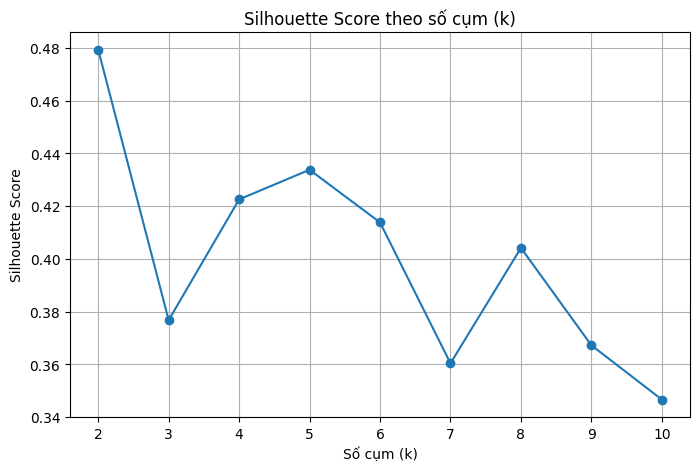

In [6]:
X = df.select_dtypes(include=["float64", "int64"])  # chỉ lấy dữ liệu số
best_score = -1
best_k = None
scores = []

for k in range(2, 11):  # thử từ 2 đến 10 cụm
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    
    try:
        score = silhouette_score(X, labels)
        scores.append((k, score))
        if score > best_score:
            best_score = score
            best_k = k
    except:
        continue

print(f"Best k = {best_k} with Silhouette Score = {best_score:.3f}")

final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_labels = final_kmeans.fit_predict(X)
df['cluster'] = final_labels  

ks, sil_scores = zip(*scores)
plt.figure(figsize=(8, 5))
plt.plot(ks, sil_scores, marker='o')
plt.title("Silhouette Score theo số cụm (k)")
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

c:\Users\DANG CUONG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


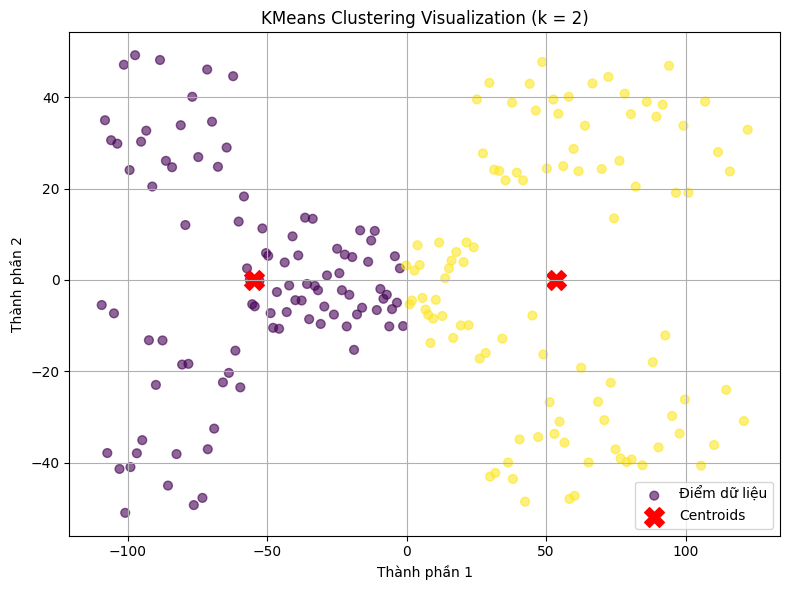

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df['cluster'] = final_labels
if X.shape[1] > 2:
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)
    centroids_2d = pca.transform(final_kmeans.cluster_centers_)
else:
    X_2d = X.values
    centroids_2d = final_kmeans.cluster_centers_

# Vẽ biểu đồ scatter
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=final_labels, cmap='viridis', s=40, alpha=0.6, label="Điểm dữ liệu")
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.title(f"KMeans Clustering Visualization (k = {best_k})")
plt.xlabel("Thành phần 1")
plt.ylabel("Thành phần 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()